# Tradeoffs possible

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


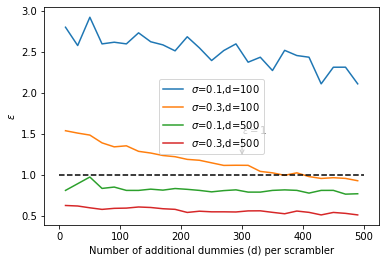

In [2]:
##################################################
%load_ext autoreload
%autoreload 2
from perf import *
from Theorical_functions import *
from Serialization import *

erase=False
tau=20
delta = 1e-4
nb_runs=1000
Plies=[0.1,0.3]  
ds=[100,500]
nmax=400

x_coordinates_dict = dict()
y_coordinates_dict=dict()
legend=dict()

name='epsilon_f(d)-tradeoffs,tau_{},delta_{},nb_runs_{}'.format(tau,delta,nb_runs)


if do_storage_exists(name) and erase==False:
    y_coordinates_dict=restore(name)
    for d in ds:
        for P in Plies:
            x_coordinates_dict['P={},d={}'.format(P,d)]=[]
            legend['P={},d={}'.format(P,d)]="$\sigma$={},d={}".format(P,d)


    for n in range(10,nmax,50): 
        print("n=",n,end="\r",flush=True)
        for d in ds:
            for P in Plies:
                x_coordinates_dict['P={},d={}'.format(P,d)].append(n)
else:
    
    for d in ds:
        for P in Plies:
            y_coordinates_dict['P={},d={}'.format(P,d)]=[]
            x_coordinates_dict['P={},d={}'.format(P,d)]=[]
            legend['P={},d={}'.format(P,d)]="$\sigma$={},d={}".format(P,d)


    for n in range(10,nmax,50): 
        print("n=",n,end="\r",flush=True)
        for d in ds:
            for P in Plies:
                y_coordinates_dict['P={},d={}'.format(P,d)].append(get_epsilon_Semi_TH_optimized(tau,P,n,d,delta,nb_runs))
                x_coordinates_dict['P={},d={}'.format(P,d)].append(n)
    
    store(name,y_coordinates_dict)


           

for y_coordinates in y_coordinates_dict:
    plt.plot(x_coordinates_dict[y_coordinates], y_coordinates_dict[y_coordinates], label=legend[y_coordinates])
plt.legend()

plt.annotate('$\\varepsilon=1$', xy=(300, 1), xytext=(300, 1.5),
            arrowprops=dict(arrowstyle="->",
                            shrinkA=0, shrinkB=20,
                            connectionstyle="angle,angleA=0,angleB=90,rad=10"),
            )

X=[0,500]
Y=[1,1]
plt.plot(X, Y,'k--')

plt.xlabel('Number of additional dummies (d) per scrambler')
plt.ylabel('$\\varepsilon$')

#plt.xlim(100, 500)
#plt.ylim(0, 3)

saveFig(name)
##################################################








    